In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import xgboost as xgb
from time import time
from sklearn.model_selection import GridSearchCV
import pickle

In [58]:
# 读取文件
# 杭州银行 欧派家居 长城汽车
# 中远海控 山西汾酒 长城汽车 万泰生物 杭州银行 欧派家居
# 华东医药 泸州老窖 中国中免 福耀玻璃
NAME = "长城汽车"
# wtsw = pd.read_excel(r"./allstock.xls",sheet_name= NAME,header=2)

In [59]:
# 文件ETL
wtsw = pd.read_excel(r"./allstocks.xls",sheet_name= NAME,header=0)
wtsw = wtsw.drop(labels=[r"股票代码",r"名称"],axis=1)
wtsw

,日期,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值
0,2019-01-02,5.61,5.63,5.54,5.62,5.60,0.01,0.1786,0.1324,7983649,44674578,51203979090,33815559690
1,2019-01-03,5.58,5.65,5.53,5.61,5.61,-0.03,-0.5348,0.1698,10235998,57137006,50930161020,33634727820
2,2019-01-04,5.65,5.66,5.50,5.53,5.58,0.07,1.2545,0.2433,14667706,82126478,51569069850,34056668850
3,2019-01-07,5.74,5.74,5.64,5.68,5.65,0.09,1.5929,0.2352,14176603,80815077,52390524060,34599164460
4,2019-01-08,5.68,5.74,5.67,5.73,5.74,-0.06,-1.0453,0.1603,9664391,54915465,51842887920,34237500720
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,2021-05-10,31.70,32.28,30.05,30.70,31.24,0.46,1.4725,0.4712,28515901,890904837,291000000000,192000000000
569,2021-05-11,30.84,31.36,30.25,30.80,31.70,-0.86,-2.7129,0.4695,28415111,873201088,283000000000,187000000000
570,2021-05-12,31.83,32.48,30.40,30.63,30.84,0.99,3.2101,0.5079,30736419,978244106,292000000000,193000000000
571,2021-05-13,30.72,31.35,30.60,31.30,31.83,-1.11,-3.4873,0.3529,21359504,659393735,282000000000,186000000000


In [60]:
wtsw = wtsw.dropna()
wtsw = wtsw.reset_index(drop = True)
wtsw

,日期,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值
0,2019-01-02,5.61,5.63,5.54,5.62,5.60,0.01,0.1786,0.1324,7983649,44674578,51203979090,33815559690
1,2019-01-03,5.58,5.65,5.53,5.61,5.61,-0.03,-0.5348,0.1698,10235998,57137006,50930161020,33634727820
2,2019-01-04,5.65,5.66,5.50,5.53,5.58,0.07,1.2545,0.2433,14667706,82126478,51569069850,34056668850
3,2019-01-07,5.74,5.74,5.64,5.68,5.65,0.09,1.5929,0.2352,14176603,80815077,52390524060,34599164460
4,2019-01-08,5.68,5.74,5.67,5.73,5.74,-0.06,-1.0453,0.1603,9664391,54915465,51842887920,34237500720
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,2021-05-10,31.70,32.28,30.05,30.70,31.24,0.46,1.4725,0.4712,28515901,890904837,291000000000,192000000000
569,2021-05-11,30.84,31.36,30.25,30.80,31.70,-0.86,-2.7129,0.4695,28415111,873201088,283000000000,187000000000
570,2021-05-12,31.83,32.48,30.40,30.63,30.84,0.99,3.2101,0.5079,30736419,978244106,292000000000,193000000000
571,2021-05-13,30.72,31.35,30.60,31.30,31.83,-1.11,-3.4873,0.3529,21359504,659393735,282000000000,186000000000


In [61]:
wtsw.loc[wtsw[r"涨跌额"] == '--',r"涨跌额"] = '0'
wtsw[r"涨跌额"] = wtsw[r"涨跌额"].astype("float")
wtsw.loc[wtsw[r"涨跌幅"] == '--',r"涨跌幅"] = '0'
wtsw[r"涨跌幅"] = wtsw[r"涨跌幅"].astype("float")
wtsw.loc[wtsw[r"前收盘"] == '--',r"前收盘"] = '0'
wtsw[r"前收盘"] = wtsw[r"前收盘"].astype("float")
time = wtsw["日期"].apply(lambda x: str(x)).copy()
time = time.apply(lambda x:x[:-9]).astype("string")
time = time.apply(lambda x:x.split('-'))

wtsw["year"] = time.apply(lambda x:x[0])
wtsw["month"] = time.apply(lambda x:x[1])
wtsw["day"] = time.apply(lambda x:x[2])
#time.tolist()
wtsw_dt = wtsw.drop(labels=["日期"],axis=1)
wtsw_dt

C:\Users\11973\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值,year,month,day
0,5.61,5.63,5.54,5.62,5.60,0.01,0.1786,0.1324,7983649,44674578,51203979090,33815559690,2019,01,02
1,5.58,5.65,5.53,5.61,5.61,-0.03,-0.5348,0.1698,10235998,57137006,50930161020,33634727820,2019,01,03
2,5.65,5.66,5.50,5.53,5.58,0.07,1.2545,0.2433,14667706,82126478,51569069850,34056668850,2019,01,04
3,5.74,5.74,5.64,5.68,5.65,0.09,1.5929,0.2352,14176603,80815077,52390524060,34599164460,2019,01,07
4,5.68,5.74,5.67,5.73,5.74,-0.06,-1.0453,0.1603,9664391,54915465,51842887920,34237500720,2019,01,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,31.70,32.28,30.05,30.70,31.24,0.46,1.4725,0.4712,28515901,890904837,291000000000,192000000000,2021,05,10
569,30.84,31.36,30.25,30.80,31.70,-0.86,-2.7129,0.4695,28415111,873201088,283000000000,187000000000,2021,05,11
570,31.83,32.48,30.40,30.63,30.84,0.99,3.2101,0.5079,30736419,978244106,292000000000,193000000000,2021,05,12
571,30.72,31.35,30.60,31.30,31.83,-1.11,-3.4873,0.3529,21359504,659393735,282000000000,186000000000,2021,05,13


In [62]:
wtsw_dt["year"] = wtsw_dt["year"].astype("int")
wtsw_dt["month"] = wtsw_dt["month"].astype("int")
wtsw_dt["day"] = wtsw_dt["day"].astype("int")
# label = wtsw_dt[r"涨跌(元)"][1:wtsw_dt.shape[0]]
label = np.log(wtsw_dt[r"收盘价"]/wtsw_dt[r"前收盘"])[1:wtsw_dt.shape[0]]
label = label.reset_index(drop = True)
wtsw_dtal = wtsw_dt.copy()
wtsw_dtal.drop(index = [len(wtsw_dt)-1],inplace=True)
wtsw_dtal["label"] = label
wtsw_dtal

,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值,year,month,day,label
0,5.61,5.63,5.54,5.62,5.60,0.01,0.1786,0.1324,7983649,44674578,51203979090,33815559690,2019,1,2,-0.005362
1,5.58,5.65,5.53,5.61,5.61,-0.03,-0.5348,0.1698,10235998,57137006,50930161020,33634727820,2019,1,3,0.012467
2,5.65,5.66,5.50,5.53,5.58,0.07,1.2545,0.2433,14667706,82126478,51569069850,34056668850,2019,1,4,0.015804
3,5.74,5.74,5.64,5.68,5.65,0.09,1.5929,0.2352,14176603,80815077,52390524060,34599164460,2019,1,7,-0.010508
4,5.68,5.74,5.67,5.73,5.74,-0.06,-1.0453,0.1603,9664391,54915465,51842887920,34237500720,2019,1,8,0.095630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,31.24,33.03,30.45,33.03,33.03,-1.79,-5.4193,0.5948,35994415,1139767717,287000000000,189000000000,2021,5,7,0.014617
568,31.70,32.28,30.05,30.70,31.24,0.46,1.4725,0.4712,28515901,890904837,291000000000,192000000000,2021,5,10,-0.027504
569,30.84,31.36,30.25,30.80,31.70,-0.86,-2.7129,0.4695,28415111,873201088,283000000000,187000000000,2021,5,11,0.031597
570,31.83,32.48,30.40,30.63,30.84,0.99,3.2101,0.5079,30736419,978244106,292000000000,193000000000,2021,5,12,-0.035495


In [63]:
# 特征工程
wtsw_fe = wtsw_dtal.copy()
wtsw_fe['range_hl'] = wtsw_fe[r"最高价"] - wtsw_fe[r"最低价"]
wtsw_fe['range_oc'] = wtsw_fe[r"开盘价"] - wtsw_fe[r"收盘价"]

## 把前几天的数据放进来当作当天属性
N = 5
lag_cols = [r'收盘价', 'range_hl', 'range_oc',r'成交量',r'流通市值']
shift_range = [x + 1 for x in range(N)]
for col in lag_cols:
    for i in shift_range:
        new_col='{}_lag_{}'.format(col, i)   # 格式化字符串
        wtsw_fe[new_col]=wtsw_fe[col].shift(i)

wtsw_fe

,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,...,成交量_lag_1,成交量_lag_2,成交量_lag_3,成交量_lag_4,成交量_lag_5,流通市值_lag_1,流通市值_lag_2,流通市值_lag_3,流通市值_lag_4,流通市值_lag_5
0,5.61,5.63,5.54,5.62,5.60,0.01,0.1786,0.1324,7983649,44674578,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.58,5.65,5.53,5.61,5.61,-0.03,-0.5348,0.1698,10235998,57137006,...,7983649.0,NaN,NaN,NaN,NaN,3.381556e+10,NaN,NaN,NaN,NaN
2,5.65,5.66,5.50,5.53,5.58,0.07,1.2545,0.2433,14667706,82126478,...,10235998.0,7983649.0,NaN,NaN,NaN,3.363473e+10,3.381556e+10,NaN,NaN,NaN
3,5.74,5.74,5.64,5.68,5.65,0.09,1.5929,0.2352,14176603,80815077,...,14667706.0,10235998.0,7983649.0,NaN,NaN,3.405667e+10,3.363473e+10,3.381556e+10,NaN,NaN
4,5.68,5.74,5.67,5.73,5.74,-0.06,-1.0453,0.1603,9664391,54915465,...,14176603.0,14667706.0,10235998.0,7983649.0,NaN,3.459916e+10,3.405667e+10,3.363473e+10,3.381556e+10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,31.24,33.03,30.45,33.03,33.03,-1.79,-5.4193,0.5948,35994415,1139767717,...,23007543.0,24592877.0,30962999.0,33162546.0,24431066.0,2.000000e+11,2.020000e+11,2.070000e+11,2.070000e+11,2.010000e+11
568,31.70,32.28,30.05,30.70,31.24,0.46,1.4725,0.4712,28515901,890904837,...,35994415.0,23007543.0,24592877.0,30962999.0,33162546.0,1.890000e+11,2.000000e+11,2.020000e+11,2.070000e+11,2.070000e+11
569,30.84,31.36,30.25,30.80,31.70,-0.86,-2.7129,0.4695,28415111,873201088,...,28515901.0,35994415.0,23007543.0,24592877.0,30962999.0,1.920000e+11,1.890000e+11,2.000000e+11,2.020000e+11,2.070000e+11
570,31.83,32.48,30.40,30.63,30.84,0.99,3.2101,0.5079,30736419,978244106,...,28415111.0,28515901.0,35994415.0,23007543.0,24592877.0,1.870000e+11,1.920000e+11,1.890000e+11,2.000000e+11,2.020000e+11


In [64]:
all_data = wtsw_fe[N:]
train = wtsw_fe[N:int(wtsw_fe.shape[0]*0.8)]
test = wtsw_fe[int(wtsw_fe.shape[0]*0.8):]
test.head(10)
# test.columns

,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,...,成交量_lag_1,成交量_lag_2,成交量_lag_3,成交量_lag_4,成交量_lag_5,流通市值_lag_1,流通市值_lag_2,流通市值_lag_3,流通市值_lag_4,流通市值_lag_5
457,26.60,26.99,24.95,25.15,24.93,1.67,6.6988,0.9314,56144292,1467830163,...,30608342.0,31527648.0,41596279.0,42689915.0,35046390.0,1.500000e+11,1.530000e+11,1.530000e+11,1.500000e+11,1.560000e+11
458,27.27,27.77,26.00,26.80,26.60,0.67,2.5188,0.8416,50727691,1360483059,...,56144292.0,30608342.0,31527648.0,41596279.0,42689915.0,1.600000e+11,1.500000e+11,1.530000e+11,1.530000e+11,1.500000e+11
459,26.45,28.17,26.35,27.99,27.27,-0.82,-3.0070,0.7211,43463637,1180394141,...,50727691.0,56144292.0,30608342.0,31527648.0,41596279.0,1.640000e+11,1.600000e+11,1.500000e+11,1.530000e+11,1.530000e+11
460,27.75,28.50,25.96,26.38,26.45,1.30,4.9149,0.9134,55057917,1518590407,...,43463637.0,50727691.0,56144292.0,30608342.0,31527648.0,1.590000e+11,1.640000e+11,1.600000e+11,1.500000e+11,1.530000e+11
461,26.77,27.21,26.09,26.96,27.75,-0.98,-3.5315,0.5862,35332657,938849970,...,55057917.0,43463637.0,50727691.0,56144292.0,30608342.0,1.670000e+11,1.590000e+11,1.640000e+11,1.600000e+11,1.500000e+11
462,27.31,27.97,26.37,26.90,26.77,0.54,2.0172,0.6011,36233447,989146423,...,35332657.0,55057917.0,43463637.0,50727691.0,56144292.0,1.610000e+11,1.670000e+11,1.590000e+11,1.640000e+11,1.600000e+11
463,27.89,28.03,26.50,27.30,27.31,0.58,2.1238,0.7193,43357480,1185800699,...,36233447.0,35332657.0,55057917.0,43463637.0,50727691.0,1.650000e+11,1.610000e+11,1.670000e+11,1.590000e+11,1.640000e+11
464,27.95,28.15,27.01,27.89,27.89,0.06,0.2151,0.6184,37275736,1034427579,...,43357480.0,36233447.0,35332657.0,55057917.0,43463637.0,1.680000e+11,1.650000e+11,1.610000e+11,1.670000e+11,1.590000e+11
465,26.34,27.67,25.95,27.52,27.95,-1.61,-5.7603,0.7345,44272658,1179004826,...,37275736.0,43357480.0,36233447.0,35332657.0,55057917.0,1.680000e+11,1.680000e+11,1.650000e+11,1.610000e+11,1.670000e+11
466,25.12,26.20,25.00,26.10,26.34,-1.22,-4.6317,0.6599,39779959,1005396793,...,44272658.0,37275736.0,43357480.0,36233447.0,35332657.0,1.590000e+11,1.680000e+11,1.680000e+11,1.650000e+11,1.610000e+11


In [65]:
all_data_X = all_data.drop(labels=[r"label"],axis=1)
all_data_Y = all_data[r"label"]
train_X = train.drop(labels=[r"label"],axis=1)
train_Y = train[r"label"]
test_X = test.drop(labels=[r"label"],axis=1)
test_Y = test[r"label"]
test_Y.head()

457    0.024876
458   -0.030531
459    0.047980
460   -0.035954
461    0.019971
Name: label, dtype: float64

In [66]:
def MAPE(true, pred):
    diff = np.abs(np.array(true) - np.array(pred))
    return sum(diff)/sum(true)

In [67]:
my_model = xgb.XGBRegressor(seed=100,
                     n_estimators=100,
                     max_depth=10,
                     eval_metric='rmse',
                     learning_rate=0.1,
                     min_child_weight=1,
                     subsample=0.7,
                     colsample_bytree=1,
                     colsample_bylevel=1,
                     n_jobs = -1,
                     gamma=0)
my_model.fit(train_X,train_Y)
predictions = my_model.predict(test_X)
#print(predictions.tolist())
#print(test_Y)

# 全数据训练 并保存模型
all_data_model = xgb.XGBRegressor(seed=100,
                     n_estimators=100,
                     max_depth=10,
                     eval_metric='rmse',
                     learning_rate=0.1,
                     min_child_weight=1,
                     subsample=0.7,
                     colsample_bytree=1,
                     colsample_bylevel=1,
                     n_jobs = -1,
                     gamma=0)
all_data_model.fit(all_data_X,all_data_Y)
pickle.dump(all_data_model,open(r'./xgb-model/'+NAME+'.pickle.dat',"wb"))

C:\Users\11973\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



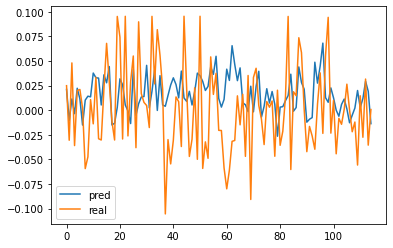

In [68]:
%matplotlib inline
x = [i for i in range(len(test_Y))]
plt.plot(x,predictions,label="pred")
plt.plot(x,test_Y,label="real")
plt.legend()
plt.show()

In [69]:
# 还原成价格(差分还原)
res = test.loc[:,["涨跌额",r"收盘价"]]
res.loc[:,r"res"] = res[r"收盘价"] + predictions
res['res'] = res['res'].shift(1)
res.head()

,涨跌额,收盘价,res
457,1.67,26.60,NaN
458,0.67,27.27,26.621027
459,-0.82,26.45,27.259466
460,1.30,27.75,26.461419
461,-0.98,26.77,27.746467


In [70]:
# 还原成价格（对数收益率还原）
res = test.loc[:,["涨跌额",r"收盘价"]]
res.loc[:,r"res"] = np.exp(predictions)*res[r"收盘价"]
res['res'] = res['res'].shift(1)
res.head(10)

,涨跌额,收盘价,res
457,1.67,26.60,NaN
458,0.67,27.27,27.165231
459,-0.82,26.45,26.984255
460,1.30,27.75,26.753775
461,-0.98,26.77,27.652143
462,0.54,27.31,27.372549
463,0.58,27.89,27.624986
464,0.06,27.95,27.471790
465,-1.61,26.34,28.236630
466,-1.22,25.12,26.716316


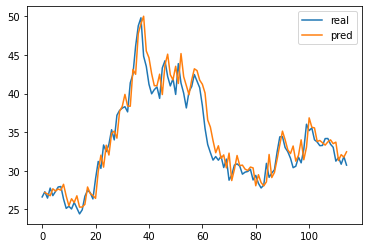

In [71]:
%matplotlib inline
x = [i for i in range(res.shape[0])]
plt.plot(x,res[r"收盘价"],label="real")
plt.plot(x,res[r"res"],label="pred")
plt.legend()
plt.show()

In [72]:
# plotly画图
from plotly.graph_objs import Scatter,Layout
import plotly
import plotly.offline as py
import numpy as np
import plotly.graph_objs as go

#setting offilne
plotly.offline.init_notebook_mode(connected=True)

In [73]:
N = 100
random_x = np.linspace(0,1,N)
random_y0 = np.random.randn(N)+5
random_y1 = np.random.randn(N)
random_y2 = np.random.randn(N)-5

#Create traces

trace1 = go.Scatter(
    x = x,
    y = res[r"收盘价"],
    mode = 'lines+markers',
    name = "real"
)
trace2 = go.Scatter(
    x = x,
    y = res[r"res"],
    mode = 'lines+markers',
    name = 'pred'
)
data = [trace1,trace2]
py.iplot(data)

In [74]:
'''
parameters={'n_estimators':range(10, 300, 10),
            'max_depth':range(2,10,1),
            'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3],
            'min_child_weight':range(5, 21, 1),
            # 'subsample':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
            'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
            'colsample_bytree':[0.5, 0.6, 0.7, 0.8, 0.9, 1],
            'colsample_bylevel':[0.5, 0.6, 0.7, 0.8, 0.9, 1]
            }
#parameters={'max_depth':range(2,10,1)}
model=xgb.XGBRegressor(seed=1,
                    n_estimators=100,
                    max_depth=3,
                    eval_metric='rmse',
                    learning_rate=0.1,
                    min_child_weight=1,
                    subsample=0.7,
                    colsample_bytree=1,
                    colsample_bylevel=1,
                    n_jobs=-1,
                    gamma=0)
gs=GridSearchCV(estimator= model,param_grid=parameters,cv=5,refit= True,scoring='neg_mean_squared_error')

gs.fit(train_X,train_Y)
print('最优参数: ', gs.best_params_)

predictions = gs.predict(test_X)
%matplotlib inline
x = [i for i in range(len(test_Y))]
plt.plot(x,predictions,label="pred")
plt.plot(x,test_Y,label="real")
plt.legend()
plt.show()
'''

'\nparameters={\'n_estimators\':range(10, 300, 10),\n            \'max_depth\':range(2,10,1),\n            \'learning_rate\': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3],\n            \'min_child_weight\':range(5, 21, 1),\n            # \'subsample\':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],\n            \'gamma\':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],\n            \'colsample_bytree\':[0.5, 0.6, 0.7, 0.8, 0.9, 1],\n            \'colsample_bylevel\':[0.5, 0.6, 0.7, 0.8, 0.9, 1]\n            }\n#parameters={\'max_depth\':range(2,10,1)}\nmodel=xgb.XGBRegressor(seed=1,\n                    n_estimators=100,\n                    max_depth=3,\n                    eval_metric=\'rmse\',\n                    learning_rate=0.1,\n                    min_child_weight=1,\n                    subsample=0.7,\n                    colsample_bytree=1,\n                    colsample_bylevel=1,\n                    n_jobs=-1,\n                    gamma=0)\ngs=GridSearchCV(estimator= mode

# 开始预测

In [75]:
# 数据准备
wtsw_p = pd.read_excel(r"./prestocks.xls",NAME,header=0)
wtsw_p = wtsw_p.drop(labels=[r"股票代码",r"名称"],axis=1)
wtsw_p = wtsw_p.reset_index(drop = True)
wtsw_p

,日期,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值
0,2021-05-07,31.24,33.03,30.45,33.03,33.03,-1.79,-5.4193,0.5948,35994415,1139767717,287000000000,189000000000
1,2021-05-10,31.70,32.28,30.05,30.70,31.24,0.46,1.4725,0.4712,28515901,890904837,291000000000,192000000000
2,2021-05-11,30.84,31.36,30.25,30.80,31.70,-0.86,-2.7129,0.4695,28415111,873201088,283000000000,187000000000
3,2021-05-12,31.83,32.48,30.40,30.63,30.84,0.99,3.2101,0.5079,30736419,978244106,292000000000,193000000000
4,2021-05-13,30.72,31.35,30.60,31.30,31.83,-1.11,-3.4873,0.3529,21359504,659393735,282000000000,186000000000
5,2021-05-14,30.74,31.23,30.41,30.50,30.72,0.02,0.0651,0.3594,21797855,672163739,282000000000,186000000000
6,2021-05-17,33.11,33.33,30.77,30.85,30.74,2.37,7.7098,0.7926,48068344,1549542682,304000000000,201000000000
7,2021-05-18,32.49,33.06,32.10,33.06,33.11,-0.62,-1.8725,0.4193,25428275,824180027,299000000000,197000000000
8,2021-05-19,34.46,35.24,32.12,32.28,32.49,1.97,6.0634,0.8964,54366496,1858229383,317000000000,209000000000
9,2021-05-20,34.37,35.83,33.88,34.60,34.46,-0.09,-0.2612,0.7913,47991501,1677436108,316000000000,208000000000


In [76]:
wtsw_p.loc[wtsw_p[r"涨跌额"] == '--',r"涨跌额"] = '0'
wtsw_p[r"涨跌额"] = wtsw_p[r"涨跌额"].astype("float")
wtsw_p.loc[wtsw_p[r"涨跌幅"] == '--',r"涨跌幅"] = '0'
wtsw_p[r"涨跌幅"] = wtsw_p[r"涨跌幅"].astype("float")
wtsw_p.loc[wtsw_p[r"前收盘"] == '--',r"前收盘"] = '0'
wtsw_p[r"前收盘"] = wtsw_p[r"前收盘"].astype("float")
time = wtsw_p["日期"].apply(lambda x: str(x)).copy()
time = time.apply(lambda x:x[:-9]).astype("string")
time = time.apply(lambda x:x.split('-'))

wtsw_p["year"] = time.apply(lambda x:x[0])
wtsw_p["month"] = time.apply(lambda x:x[1])
wtsw_p["day"] = time.apply(lambda x:x[2])
#time.tolist()
wtsw_dt_p = wtsw_p.drop(labels=["日期"],axis=1)
wtsw_dt_p

C:\Users\11973\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值,year,month,day
0,31.24,33.03,30.45,33.03,33.03,-1.79,-5.4193,0.5948,35994415,1139767717,287000000000,189000000000,2021,05,07
1,31.70,32.28,30.05,30.70,31.24,0.46,1.4725,0.4712,28515901,890904837,291000000000,192000000000,2021,05,10
2,30.84,31.36,30.25,30.80,31.70,-0.86,-2.7129,0.4695,28415111,873201088,283000000000,187000000000,2021,05,11
3,31.83,32.48,30.40,30.63,30.84,0.99,3.2101,0.5079,30736419,978244106,292000000000,193000000000,2021,05,12
4,30.72,31.35,30.60,31.30,31.83,-1.11,-3.4873,0.3529,21359504,659393735,282000000000,186000000000,2021,05,13
5,30.74,31.23,30.41,30.50,30.72,0.02,0.0651,0.3594,21797855,672163739,282000000000,186000000000,2021,05,14
6,33.11,33.33,30.77,30.85,30.74,2.37,7.7098,0.7926,48068344,1549542682,304000000000,201000000000,2021,05,17
7,32.49,33.06,32.10,33.06,33.11,-0.62,-1.8725,0.4193,25428275,824180027,299000000000,197000000000,2021,05,18
8,34.46,35.24,32.12,32.28,32.49,1.97,6.0634,0.8964,54366496,1858229383,317000000000,209000000000,2021,05,19
9,34.37,35.83,33.88,34.60,34.46,-0.09,-0.2612,0.7913,47991501,1677436108,316000000000,208000000000,2021,05,20


In [77]:
wtsw_dt_p["year"] = wtsw_dt_p["year"].astype("int")
wtsw_dt_p["month"] = wtsw_dt_p["month"].astype("int")
wtsw_dt_p["day"] = wtsw_dt_p["day"].astype("int")
# label = wtsw_dt[r"涨跌(元)"][1:wtsw_dt.shape[0]]
# label = np.log(wtsw_dt_p[r"收盘价"]/wtsw_dt_p[r"前收盘"])[1:wtsw_dt_p.shape[0]]
# label = label.reset_index(drop = True)
wtsw_dtal_p = wtsw_dt_p.copy()
# wtsw_dtal_p.drop(index = [len(wtsw_dt_p)-1],inplace=True)
# wtsw_dtal_p["label"] = label
wtsw_dtal_p

,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值,year,month,day
0,31.24,33.03,30.45,33.03,33.03,-1.79,-5.4193,0.5948,35994415,1139767717,287000000000,189000000000,2021,5,7
1,31.70,32.28,30.05,30.70,31.24,0.46,1.4725,0.4712,28515901,890904837,291000000000,192000000000,2021,5,10
2,30.84,31.36,30.25,30.80,31.70,-0.86,-2.7129,0.4695,28415111,873201088,283000000000,187000000000,2021,5,11
3,31.83,32.48,30.40,30.63,30.84,0.99,3.2101,0.5079,30736419,978244106,292000000000,193000000000,2021,5,12
4,30.72,31.35,30.60,31.30,31.83,-1.11,-3.4873,0.3529,21359504,659393735,282000000000,186000000000,2021,5,13
5,30.74,31.23,30.41,30.50,30.72,0.02,0.0651,0.3594,21797855,672163739,282000000000,186000000000,2021,5,14
6,33.11,33.33,30.77,30.85,30.74,2.37,7.7098,0.7926,48068344,1549542682,304000000000,201000000000,2021,5,17
7,32.49,33.06,32.10,33.06,33.11,-0.62,-1.8725,0.4193,25428275,824180027,299000000000,197000000000,2021,5,18
8,34.46,35.24,32.12,32.28,32.49,1.97,6.0634,0.8964,54366496,1858229383,317000000000,209000000000,2021,5,19
9,34.37,35.83,33.88,34.60,34.46,-0.09,-0.2612,0.7913,47991501,1677436108,316000000000,208000000000,2021,5,20


In [78]:
# 特征工程
wtsw_fe_p = wtsw_dtal_p.copy()
wtsw_fe_p['range_hl'] = wtsw_fe_p[r"最高价"] - wtsw_fe_p[r"最低价"]
wtsw_fe_p['range_oc'] = wtsw_fe_p[r"开盘价"] - wtsw_fe_p[r"收盘价"]

## 把前几天的数据放进来当作当天属性
N = 5
lag_cols = [r'收盘价', 'range_hl', 'range_oc',r'成交量',r'流通市值']
shift_range = [x + 1 for x in range(N)]
for col in lag_cols:
    for i in shift_range:
        new_col='{}_lag_{}'.format(col, i)   # 格式化字符串
        wtsw_fe_p[new_col]=wtsw_fe_p[col].shift(i)

wtsw_fe_p

,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,...,成交量_lag_1,成交量_lag_2,成交量_lag_3,成交量_lag_4,成交量_lag_5,流通市值_lag_1,流通市值_lag_2,流通市值_lag_3,流通市值_lag_4,流通市值_lag_5
0,31.24,33.03,30.45,33.03,33.03,-1.79,-5.4193,0.5948,35994415,1139767717,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31.70,32.28,30.05,30.70,31.24,0.46,1.4725,0.4712,28515901,890904837,...,35994415.0,NaN,NaN,NaN,NaN,1.890000e+11,NaN,NaN,NaN,NaN
2,30.84,31.36,30.25,30.80,31.70,-0.86,-2.7129,0.4695,28415111,873201088,...,28515901.0,35994415.0,NaN,NaN,NaN,1.920000e+11,1.890000e+11,NaN,NaN,NaN
3,31.83,32.48,30.40,30.63,30.84,0.99,3.2101,0.5079,30736419,978244106,...,28415111.0,28515901.0,35994415.0,NaN,NaN,1.870000e+11,1.920000e+11,1.890000e+11,NaN,NaN
4,30.72,31.35,30.60,31.30,31.83,-1.11,-3.4873,0.3529,21359504,659393735,...,30736419.0,28415111.0,28515901.0,35994415.0,NaN,1.930000e+11,1.870000e+11,1.920000e+11,1.890000e+11,NaN
5,30.74,31.23,30.41,30.50,30.72,0.02,0.0651,0.3594,21797855,672163739,...,21359504.0,30736419.0,28415111.0,28515901.0,35994415.0,1.860000e+11,1.930000e+11,1.870000e+11,1.920000e+11,1.890000e+11
6,33.11,33.33,30.77,30.85,30.74,2.37,7.7098,0.7926,48068344,1549542682,...,21797855.0,21359504.0,30736419.0,28415111.0,28515901.0,1.860000e+11,1.860000e+11,1.930000e+11,1.870000e+11,1.920000e+11
7,32.49,33.06,32.10,33.06,33.11,-0.62,-1.8725,0.4193,25428275,824180027,...,48068344.0,21797855.0,21359504.0,30736419.0,28415111.0,2.010000e+11,1.860000e+11,1.860000e+11,1.930000e+11,1.870000e+11
8,34.46,35.24,32.12,32.28,32.49,1.97,6.0634,0.8964,54366496,1858229383,...,25428275.0,48068344.0,21797855.0,21359504.0,30736419.0,1.970000e+11,2.010000e+11,1.860000e+11,1.860000e+11,1.930000e+11
9,34.37,35.83,33.88,34.60,34.46,-0.09,-0.2612,0.7913,47991501,1677436108,...,54366496.0,25428275.0,48068344.0,21797855.0,21359504.0,2.090000e+11,1.970000e+11,2.010000e+11,1.860000e+11,1.860000e+11


In [79]:
all_data_p = wtsw_fe_p[N:]
all_data_p

,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,...,成交量_lag_1,成交量_lag_2,成交量_lag_3,成交量_lag_4,成交量_lag_5,流通市值_lag_1,流通市值_lag_2,流通市值_lag_3,流通市值_lag_4,流通市值_lag_5
5,30.74,31.23,30.41,30.50,30.72,0.02,0.0651,0.3594,21797855,672163739,...,21359504.0,30736419.0,28415111.0,28515901.0,35994415.0,1.860000e+11,1.930000e+11,1.870000e+11,1.920000e+11,1.890000e+11
6,33.11,33.33,30.77,30.85,30.74,2.37,7.7098,0.7926,48068344,1549542682,...,21797855.0,21359504.0,30736419.0,28415111.0,28515901.0,1.860000e+11,1.860000e+11,1.930000e+11,1.870000e+11,1.920000e+11
7,32.49,33.06,32.10,33.06,33.11,-0.62,-1.8725,0.4193,25428275,824180027,...,48068344.0,21797855.0,21359504.0,30736419.0,28415111.0,2.010000e+11,1.860000e+11,1.860000e+11,1.930000e+11,1.870000e+11
8,34.46,35.24,32.12,32.28,32.49,1.97,6.0634,0.8964,54366496,1858229383,...,25428275.0,48068344.0,21797855.0,21359504.0,30736419.0,1.970000e+11,2.010000e+11,1.860000e+11,1.860000e+11,1.930000e+11
9,34.37,35.83,33.88,34.60,34.46,-0.09,-0.2612,0.7913,47991501,1677436108,...,54366496.0,25428275.0,48068344.0,21797855.0,21359504.0,2.090000e+11,1.970000e+11,2.010000e+11,1.860000e+11,1.860000e+11
10,34.14,35.00,33.20,34.38,34.37,-0.23,-0.6692,0.6804,41262518,1409092494,...,47991501.0,54366496.0,25428275.0,48068344.0,21797855.0,2.080000e+11,2.090000e+11,1.970000e+11,2.010000e+11,1.860000e+11
11,33.95,34.27,32.86,33.56,34.14,-0.19,-0.5565,0.4311,26146217,877436746,...,41262518.0,47991501.0,54366496.0,25428275.0,48068344.0,2.070000e+11,2.080000e+11,2.090000e+11,1.970000e+11,2.010000e+11
12,35.30,35.75,33.47,33.90,33.95,1.35,3.9764,0.6713,40715103,1418037048,...,26146217.0,41262518.0,47991501.0,54366496.0,25428275.0,2.060000e+11,2.070000e+11,2.080000e+11,2.090000e+11,1.970000e+11
13,37.03,38.83,36.13,36.13,35.30,1.73,4.9008,1.0620,64408479,2442652483,...,40715103.0,26146217.0,41262518.0,47991501.0,54366496.0,2.140000e+11,2.060000e+11,2.070000e+11,2.080000e+11,2.090000e+11
14,36.35,37.60,36.08,37.54,37.03,-0.68,-1.8363,0.5543,33616735,1228253202,...,64408479.0,40715103.0,26146217.0,41262518.0,47991501.0,2.250000e+11,2.140000e+11,2.060000e+11,2.070000e+11,2.080000e+11


In [80]:
# 模型读取
model_name = r'./xgb-model/'+NAME+'.pickle.dat'
model = pickle.load(open(model_name,'rb'))

In [81]:
# 预测输出
predictions = model.predict(all_data_p)
predictions

C:\Users\11973\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



array([ 1.1392834e-02, -1.0696004e-02,  6.9566588e-03,  5.2833252e-02,
       -8.8817767e-05,  3.7146837e-02,  5.3103641e-03, -2.9140770e-02,
       -1.5762256e-02,  7.1956222e-03,  1.3858206e-03,  1.0057233e-02,
       -1.5508899e-02, -1.3502192e-02, -2.3057468e-02, -2.2988221e-02,
        1.2157515e-02,  1.3624319e-02, -5.1740436e-03,  2.4237566e-02,
       -3.1179585e-03, -1.1673373e-03], dtype=float32)

In [82]:
# 还原成价格（对数收益率还原）
res = all_data_p.loc[:,['year','month','day',"涨跌额",r"收盘价"]]
res.loc[:,r"预测的收盘价"] = np.exp(predictions)*res[r"收盘价"]
res['预测的收盘价'] = res['预测的收盘价'].shift(1)
res = res.reset_index(drop = True)
res = res.drop(index=[0])
res

,year,month,day,涨跌额,收盘价,预测的收盘价
1,2021,5,17,2.37,33.11,31.092216
2,2021,5,18,-0.62,32.49,32.757742
3,2021,5,19,1.97,34.46,32.716809
4,2021,5,20,-0.09,34.37,36.329587
5,2021,5,21,-0.23,34.14,34.366948
6,2021,5,24,-0.19,33.95,35.432041
7,2021,5,25,1.35,35.30,34.130766
8,2021,5,26,1.73,37.03,34.286175
9,2021,5,27,-0.68,36.35,36.450899
10,2021,5,28,0.40,36.75,36.612504


In [83]:
# 写入文件保存
res.to_excel(f'{NAME}-回测-outputs.xls',sheet_name=NAME,index=False)